In [1]:
# Import Project
import sys
sys.path.append('.')
from amongus.agent import *
from amongus.game import *
from amongus.model import *
from amongus.world import *

# External Packages
import numpy as np
import torch

In [7]:
map_size = 100
num_tasks = 10
num_agents = 20
max_steps = 1000
message_length = 1

params = {
    'vote_period': 5,
    'impostor_frac': 0.2,
    'message_length': message_length
}

In [8]:
def sample():
    game = Game(map_size, num_tasks, num_agents, max_steps, params=params)
    model = Model(num_agents, message_length)
    o_t = game.get_observations()
    a_t = game.get_actions(model, o_t)
    game.reset()
    ongoing = True

    count = 0
    while ongoing:
        o_t, r_t, ongoing = game.step(a_t)
        a_t = game.get_actions(model, o_t)
        count += 1

    return count, game.win_condition

In [ ]:
from time import time
from tqdm import tqdm

start = time()
samples = []
for _ in tqdm(range(100)):
    samples.append(sample())
# samples = [sample() for _ in range(100)]
elapsed = time() - start

print('Average Game Time: {}'.format(elapsed/1000.0))

 47%|████▋     | 47/100 [00:14<00:13,  3.87it/s]

In [ ]:
counts, outcomes = zip(*samples)

freq = {e: outcomes.count(e) for e in set(outcomes)}
print(freq)

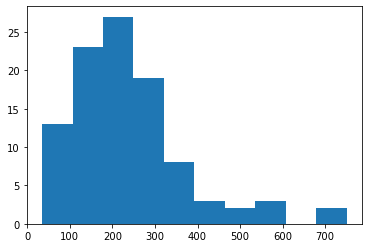

In [11]:
from matplotlib import pyplot as plt

plt.hist(counts, bins=20)
plt.show()

In [12]:
nums = sorted(list(set(counts)))
counts = [counts.count(n) for n in nums]

<BarContainer object of 61 artists>

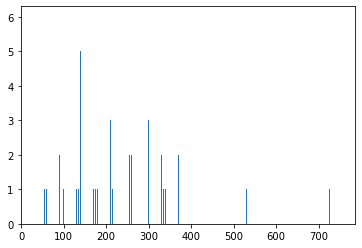

In [14]:
plt.bar(nums, counts)

In [6]:
num_agents = 10
impostor_frac = 0.2

rng = np.random.default_rng()
rng.choice(num_agents, size=max(int(num_agents * impostor_frac), 1), replace=False)

array([8, 5])

In [8]:
samples = np.array(samples)
samples.mean()

24.058